# Exploratory Data Analysis:

## Can lifestyle and behavioral factors predict a person’s risk of developing Diabetes?

This notebook contains my exploratory data analysis (EDA) on the 'Diabetes Health Indicators' dataset. My aim is to understand the dataset by identifying any relationships, inspect data quality and visualise this through graphs. These insights will allow me to carry out feature selection and engineering for my model.

Diabetes is a chronic disease that occurs when the pancreas doesn't make enough of a hormone called insulin or an individual develops 'insulin resistance'. Insulin helps the body turn glucose into energy, and without this the level of glucose in the bloodstream remains high. Over time, this constant level of raised blood sugar leads to serious damage to the body, especially the nerves and blood vessels. 

There are a few 'types' of diabetes. This includes type 1, type 2 and gestational diabetes. There is also 'pre-diabetes', where blood sugar levels are above what is considered normal but not high enough to be considered as having diabetes. Type 1 diabetes is an autoimmune condition so is unpreventable however, pre-diabetes/ gestational diabetes/ type 2 diabetes are largely preventable by leading a healthy lifestyle (there is of course a genetic component to this disease, which may make individuals more at risk).

In [1]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the dataset
df = pd.read_csv("diabetes_dataset.csv")

## Inspecting the data

In [3]:
# Initial look at dataframe by pulling up first 5 rows
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [4]:
# Check column names, non-null values and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [5]:
# Checking statistics for all numerical columns
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000,1.000000


Checking for potential outliers or unrealistic values, and any columns with large value ranges for potential scaling later. However, no potential errors observed in this dataset.

In [6]:
# check if there's duplicates in the data
df.duplicated().unique()

array([False])

In [7]:
# checking if there's null values in the data
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


## Visual analysis

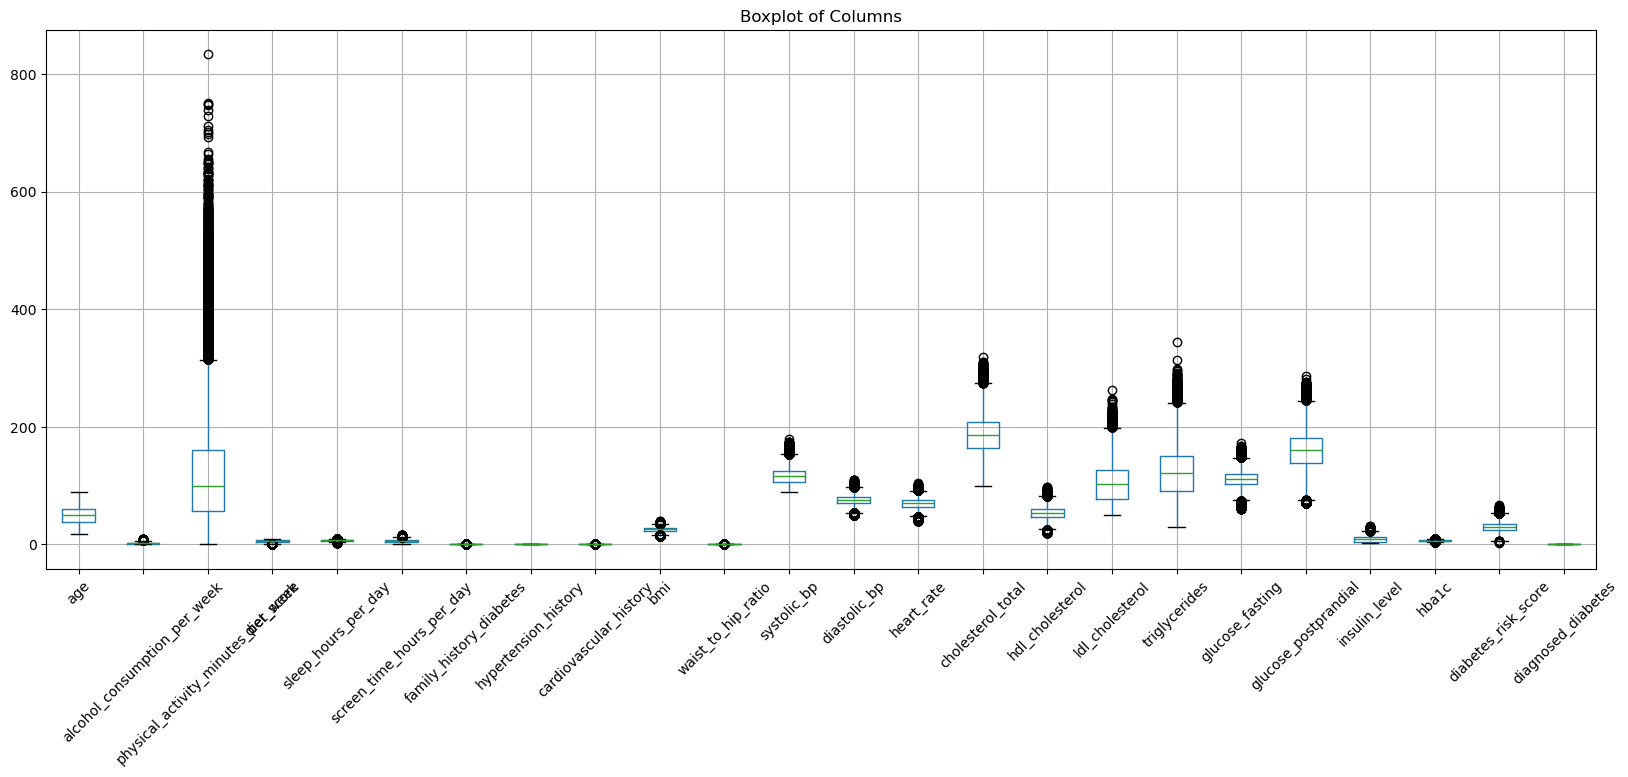

In [8]:
# Boxplot to visually inspect outliers across columns
# Checking all numerical columns

plt.figure(figsize=(20,7))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Columns")
plt.show()

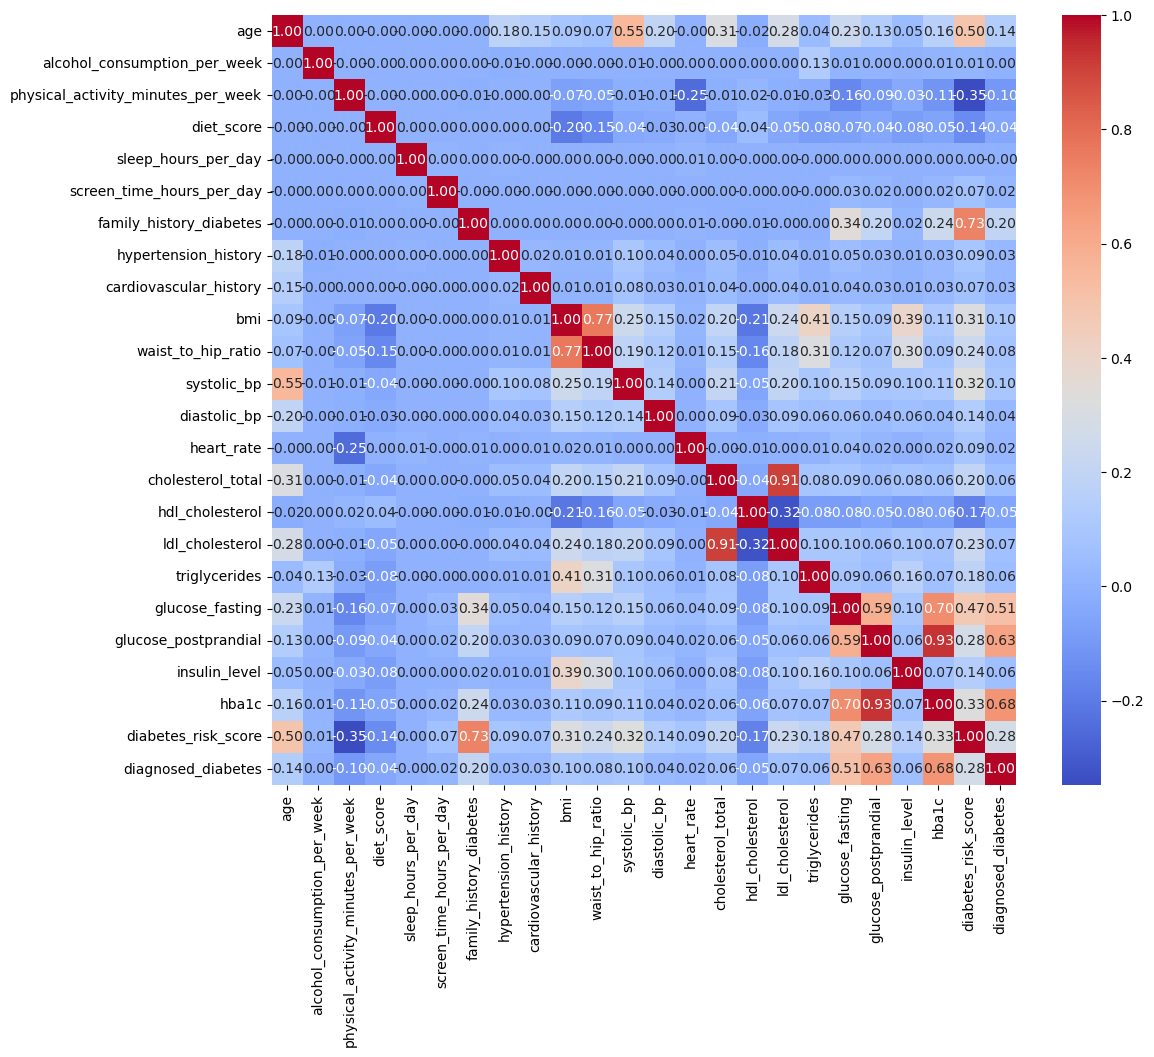

In [9]:
# Creating a correlation heatmap for all numerical columns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Obervations:
* Strong positive relationship hba1c and glucose-postprandial/glucose-fasting
* Strong positive relationship between ldl_cholestrol and cholestrol_total
* Strong positive relationship between bmi and waist_to_hip_ratio
* Strong positive relationship between diabetes risk score and glucose fasting/family-history diabetes/age
* Strong negative relationship between diabetes risk score and physical activity

In [10]:
# dropped due to multicollinearity and dropping diet_score due to accuracy of inputted data
df.drop(columns = ['diabetes_risk_score', 'diabetes_stage', 'cholesterol_total', 'waist_to_hip_ratio', 'diet_score', 'glucose_postprandial', 'glucose_fasting'], inplace = True)

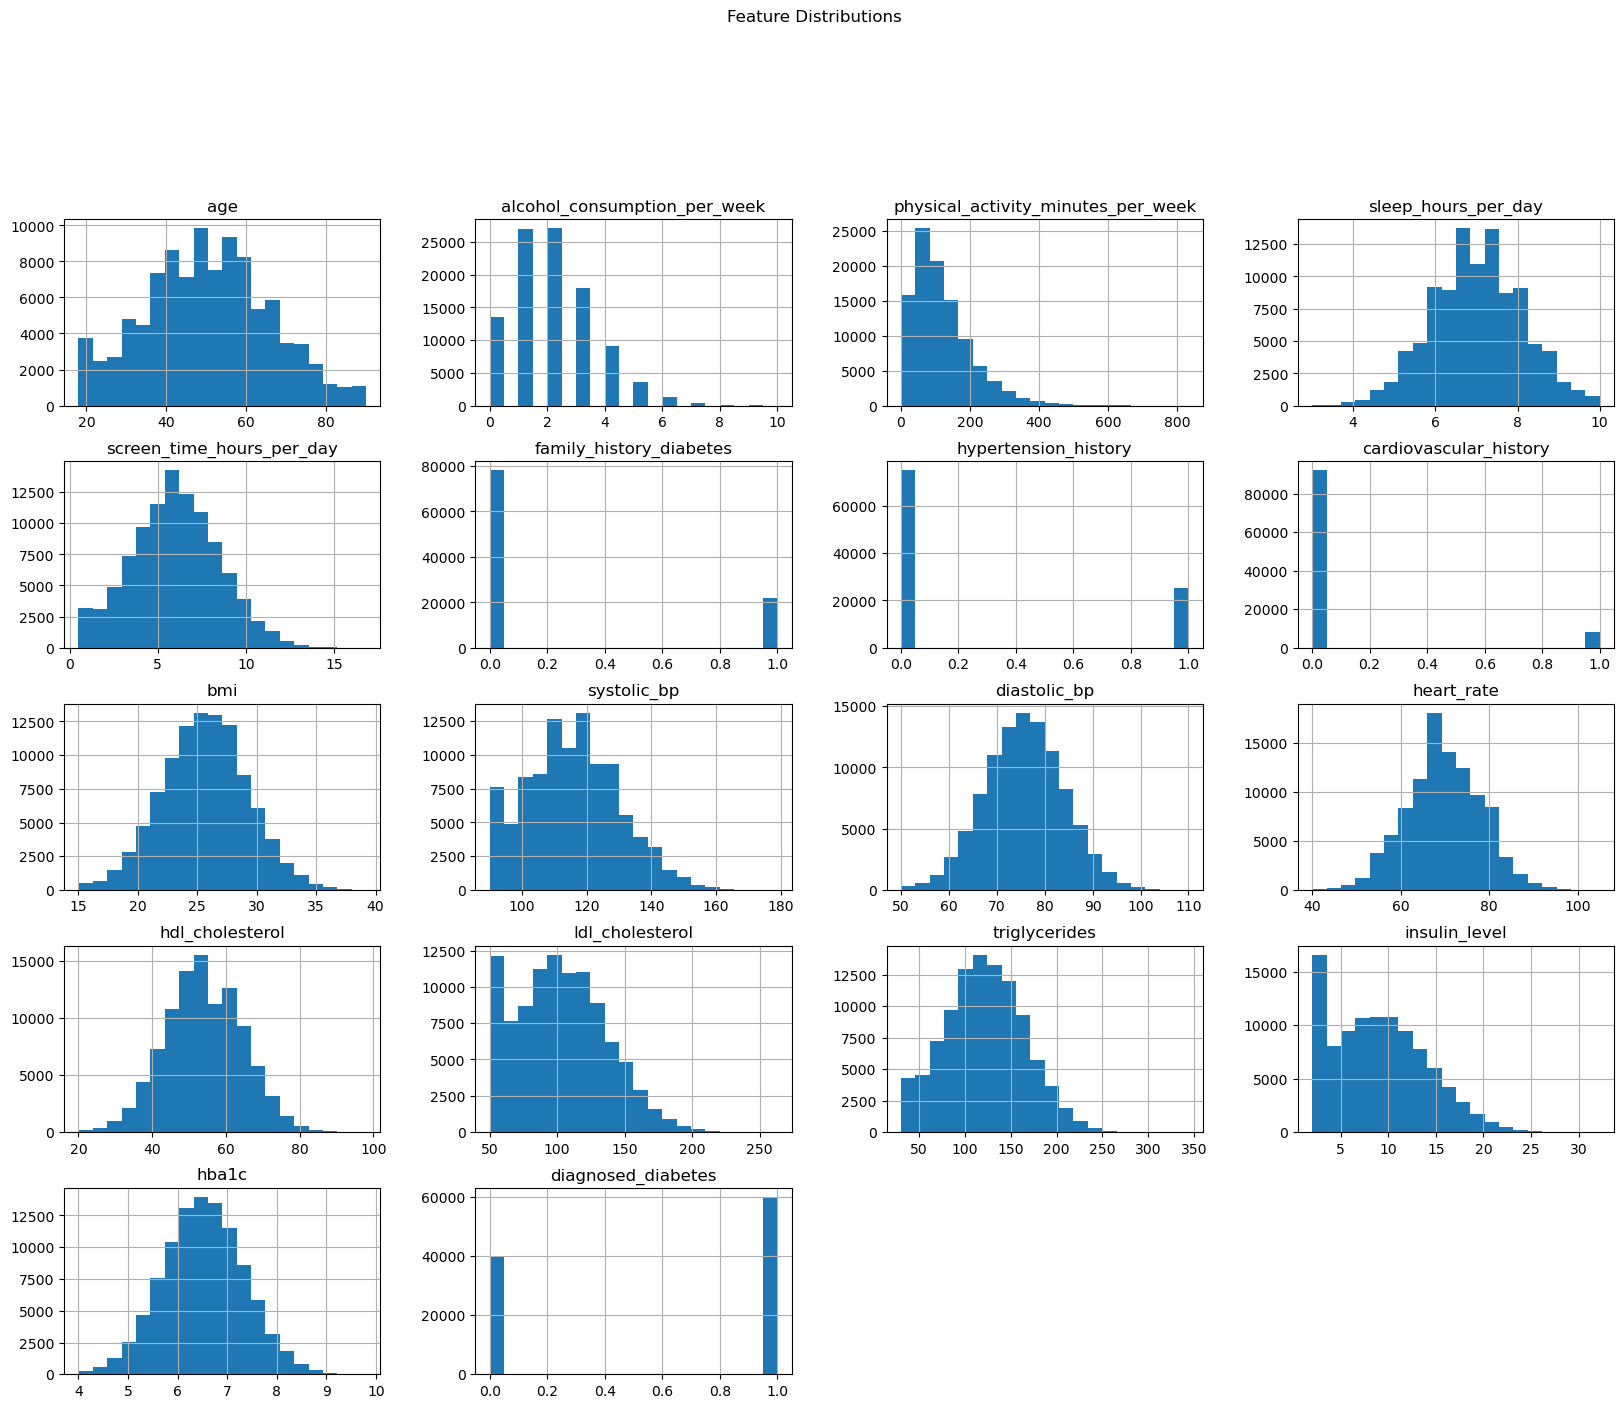

In [17]:
df.hist(figsize=(20,15), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

Histograms used to assess distribution of data and check for any skews. This will also help to choose an appropriate model in the later stages.

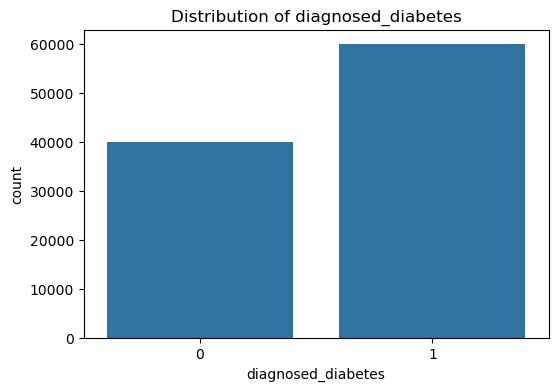

In [12]:
# Value counts barchart for "diagnosed_diabetes"
df["diagnosed_diabetes"].value_counts()

# plot data
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diagnosed_diabetes")
plt.title("Distribution of diagnosed_diabetes")
plt.show()

The dataset contains 60% diagnosed diabetes cases and 40% non-diabetes cases.
Although this represents a mild class imbalance, it is not severe enough to require resampling.

The dataset contains 60% diagnosed diabetes and 40% non-diabetic cases. This shows a slight class 

In [13]:
df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,sleep_hours_per_day,...,bmi,systolic_bp,diastolic_bp,heart_rate,hdl_cholesterol,ldl_cholesterol,triglycerides,insulin_level,hba1c,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,7.9,...,30.5,134,78,68,41,160,145,6.36,8.18,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.5,...,23.1,129,76,67,55,50,30,2.00,5.63,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,10.0,...,22.2,115,73,74,66,99,36,5.07,7.51,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,6.6,...,26.8,120,93,68,50,79,140,5.28,9.03,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.4,...,21.2,92,67,67,52,125,160,12.74,7.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,6.4,...,29.8,126,74,63,45,150,116,14.58,5.55,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,6.8,...,26.5,130,76,57,55,123,146,9.02,5.97,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,5.0,...,25.6,107,87,69,50,111,184,2.57,5.21,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,6.7,...,26.8,115,77,58,68,91,116,9.81,5.53,0


EDA summary:

* Dataset appears clean with no duplicates or null values
* Analysis of correlations show clear relationships between features
* 'Diabetic risk score' and 'diabetic stage' have been dropped due to multicollinearity 

In [15]:
df.to_csv('cleaned_diabetes_dataset_2.csv', index=False)